<h1>Principal Component Analysis Versus Linear Regression<span class="tocSkip"></span></h1>

* This Jupyter notebook accompanies the **Linear Algebra** course in the [ICME Summer Workshops in Data Science](https://icme.stanford.edu/icme-summer-workshops-2021-fundamentals-data-science#LinAlg) (2021) series. 
* This course is taught by Laura Lyman and Professor Margot Gerritsen. 

In this module, we explore some of the differences between ordinary least squares (i.e. linear regression) and principal component analysis. To follow along, you can interatively run and update blocks of code. After clicking into a single code block, type `Shift Enter` to execute it. Keep in mind that some code blocks have dependencies on previous blocks, and therefore the blocks should be evaluated in order. 

# Introduction

Ordinary least squares (OLS) and principal component analysis (pca) are both popular techniques in data science for accomplishing similar goals. Both methods pick the "best" linear relationships for approximating some response variable $y$ in terms of a set of explanatory variables $x_1, \ldots, x_p.$ In particular, OLS and pca each pick linear models that minimize the "error" between the actual observed values of $y$ and the $y$ values predicted by the model. The key difference is that OLS and pca define "error" differently. 

Before stating symbolically how OLS and pca measure error, we will show such errors visually in the following example. This will provide the geometric intuition that sits at the *heart* of how these methods work. 


In [1]:
from   numpy import genfromtxt
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# Optional; suppresses scientific notation
np.set_printoptions(suppress=True)

In [2]:
## TO DO: Are the columns features, or something else? Is that the right word for them?
def center_matrix(X):
    [n,p]     = X.shape
    X_c       = np.zeros_like(X)
    # Subtract off the mean of each property i.e. subtract from each column the avg. of that column 
    for feature_idx in range(p):
        X_c[:,feature_idx] = X[:,feature_idx] - np.mean(X[:,feature_idx])
    return(X_c)


# Numerical Application & Example: Heart Health

Suppose the following matrix $X$ contains resting heart rate (HR) and diastolic blood pressure (BP) data for healthy adolescent women aged 14 - 16. (The data was simulated based off the means and standard deviations from actual patient data given in **academic paper**). 

In [3]:
X = np.array([[69.57, 76.90], [61.81, 66.66], [71.62, 59.56], \
              [58.59, 69.39], [63.18, 62.82], [62.27, 60.44], \
              [65.96, 72.60], [59.25, 61.56], [63.68, 82.86], \
              [49.48, 42.08]], dtype = np.float64)

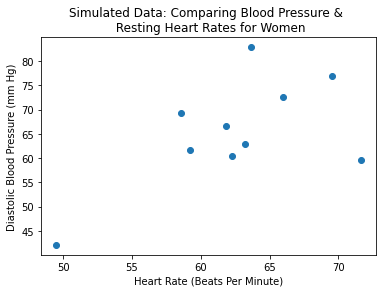

In [4]:
fig = plt.subplots()
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Heart Rate (Beats Per Minute)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")
plt.title("Simulated Data: Comparing Blood Pressure & \n Resting Heart Rates for Women")
plt.show()

In [5]:
import copy
X_c = copy.deepcopy(center_matrix(X))
X_c

array([[  7.029,  11.413],
       [ -0.731,   1.173],
       [  9.079,  -5.927],
       [ -3.951,   3.903],
       [  0.639,  -2.667],
       [ -0.271,  -5.047],
       [  3.419,   7.113],
       [ -3.291,  -3.927],
       [  1.139,  17.373],
       [-13.061, -23.407]])

In [6]:
C = 1/X_c.shape[0] * np.matmul(np.transpose(X_c), X_c)

In [7]:
C

array([[ 34.286889,  37.254583],
       [ 37.254583, 113.030521]])

In [8]:
[Lambda,V] = np.linalg.eig(C)
Lambda

array([ 19.45497958, 127.86243042])

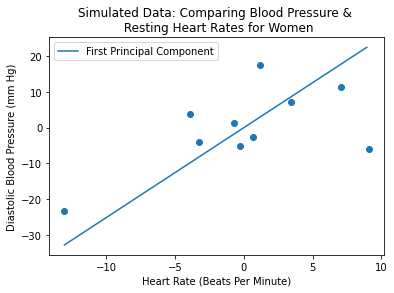

In [9]:
fig, ax = plt.subplots()
plt.scatter(X_c[:,0],X_c[:,1])
plt.xlabel("Heart Rate (Beats Per Minute)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")
plt.title("Simulated Data: Comparing Blood Pressure & \n Resting Heart Rates for Women")

x_axis = np.arange(np.min(X_c[:,0]), np.max(X_c[:,0]))

# Careful! Lambda isn't ordered here like it should be, so actually the second column of V corresponds
# to the principal component
prin_comp_vec = V[:,1]
prin_comp_line = lambda x: prin_comp_vec[1]/prin_comp_vec[0]*x
plt.plot(x_axis,prin_comp_line(x_axis))

plt.legend(['First Principal Component'])

plt.show()

In [10]:
X

array([[69.57, 76.9 ],
       [61.81, 66.66],
       [71.62, 59.56],
       [58.59, 69.39],
       [63.18, 62.82],
       [62.27, 60.44],
       [65.96, 72.6 ],
       [59.25, 61.56],
       [63.68, 82.86],
       [49.48, 42.08]])

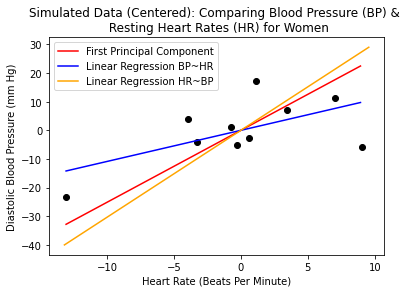

In [11]:
fig, ax = plt.subplots()
plt.scatter(X_c[:,0],X_c[:,1], c = 'black')
plt.xlabel("Heart Rate (Beats Per Minute)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")
plt.title("Simulated Data (Centered): Comparing Blood Pressure (BP) & \n Resting Heart Rates (HR) for Women")

x_axis = np.arange(np.min(X_c[:,0]), np.max(X_c[:,0]))
# y_axis = np.arange(np.min(X_c[:,1]), np.max(X_c[:,1]))
y_axis = np.arange(-40,30)
# Careful! Lambda isn't ordered here like it should be, so actually the second column of V corresponds
# to the principal component
prin_comp_vec = V[:,1]
prin_comp_line = lambda x: prin_comp_vec[1]/prin_comp_vec[0]*x
plt.plot(x_axis,prin_comp_line(x_axis), c = 'red')


m, b = np.polyfit(X_c[:,0], X_c[:, 1],1)
plt.plot(x_axis, m*x_axis + b, 'blue')

m_x, b_x = np.polyfit(X_c[:,1], X_c[:, 0], 1)
plt.plot(m_x*y_axis + b_x, y_axis, 'orange')
# pred_DBP = model.predict(x_axis)
# print(pred_DBP)
# plt.plot(x_axis, pred_DBP)
# plt.show()
plt.legend(['First Principal Component', 'Linear Regression BP~HR', 'Linear Regression HR~BP'])
plt.show()

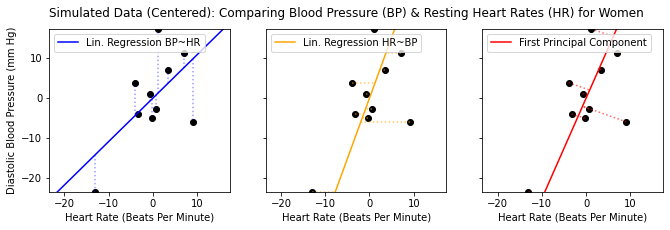

In [12]:
plt.close('all')
# %matplotlib notebook
fig, axs = plt.subplots(1, 3,  figsize=(11, 3), sharey=True)

axs[0].set_xlabel("Heart Rate (Beats Per Minute)")
axs[1].set_xlabel("Heart Rate (Beats Per Minute)")
axs[2].set_xlabel("Heart Rate (Beats Per Minute)")
axs[0].set_ylabel("Diastolic Blood Pressure (mm Hg)")

# axs[0].set_xlim(-25,25)
# axs[1].set_xlim(-25,25)
# axs[2].set_xlim(-25,25)
# axs[0].set_ylim(-25,25)
# axs[1].set_ylim(-25,25)
# axs[2].set_ylim(-25,25)
axs[0].set_xlim(np.min(X_c[:,1]), np.max(X_c[:,1]))
axs[0].set_ylim(np.min(X_c[:,1]), np.max(X_c[:,1]))
axs[1].set_xlim(np.min(X_c[:,1]), np.max(X_c[:,1]))
axs[1].set_ylim(np.min(X_c[:,1]), np.max(X_c[:,1]))

# x_axis = np.arange(np.min(X_c[:,0]), np.max(X_c[:,0]))

# Force plots to be square so that we can properly view orthogonal components
x_axis = np.arange(np.min(X_c[:,1]), np.max(X_c[:,1]))

m, b = np.polyfit(X_c[:,0], X_c[:, 1],1)
line, = axs[0].plot(x_axis, m*x_axis + b, color = 'blue')
axs[0].vlines(X_c[:,0], m*X_c[:,0] + b, X_c[:,1], linestyles='dotted', color = 'blue', alpha = .4)
axs[0].scatter(X_c[:,0],X_c[:,1], c = 'black', alpha = 1)
axs[0].legend(['Lin. Regression BP~HR'], loc = 'upper left')

# y_axis = np.arange(np.min(X_c[:,1]), np.max(X_c[:,1]))
y_axis = np.arange(-40,30)


axs[1].plot(m_x*y_axis + b_x, y_axis, color = 'orange')
axs[1].hlines(X_c[:,1],X_c[:,0], m_x*X_c[:,1] + b_x, linestyles='dotted', color = 'orange', alpha = .6)
axs[1].legend(['Lin. Regression HR~BP'], loc = 'upper left')
axs[1].scatter(X_c[:,0],X_c[:,1], c = 'black', alpha = 1)

axs[2].set_xlim(np.min(X_c[:,1]), np.max(X_c[:,1]))
axs[2].set_ylim(np.min(X_c[:,1]), np.max(X_c[:,1]))
axs[2].plot(x_axis,prin_comp_line(x_axis), color = 'red')


n = X_c.shape[0]
# Iterate through the data to compute orthogonals
for i in range(n):
    w  = X_c[i,:]
    cv = np.dot(prin_comp_vec,w)/np.linalg.norm(prin_comp_vec)*prin_comp_vec
    axs[2].plot([w[0],cv[0]],[w[1],cv[1]], linestyle = 'dotted', alpha = .6, color = 'red')
axs[2].scatter(X_c[:,0],X_c[:,1], c = 'black', alpha = 1)
axs[2].legend(['First Principal Component'], loc = 'upper left')    
fig.suptitle("Simulated Data (Centered): Comparing Blood Pressure (BP) & Resting Heart Rates (HR) for Women")

plt.show()


<IPython.core.display.Javascript object>


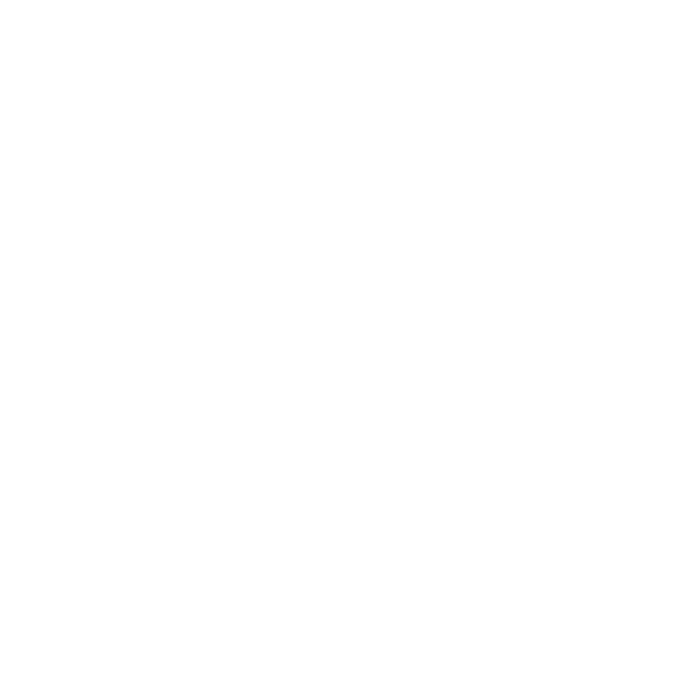

In [13]:
from matplotlib.widgets import Slider, Button
%matplotlib notebook
plt.close('all')

# Creates vertical lines between the true data points and the regression line
# with slope m and intercept b
# Of course assumes x_data_pts and y_data_pts have the same length (since these are coordinate pairs)
def make_vlines(x_data_pts, y_data_pts, m, b, first_run = True):
    sum_of_vert_dists = np.linalg.norm(m*x_data_pts + b - y_data_pts, 2)
    for i in range(x_data_pts.shape[0]):
        x_i      = x_data_pts[i]
        if first_run:
            vline, = ax.plot([x_i, x_i], [y_data_pts[i],  m*x_i + b], linestyle = 'dotted', \
                             alpha = .6, color = 'blue')
            the_vlines.append(vline)
        else: 
            the_vlines[i].set_ydata([y_data_pts[i], m*x_i + b])
    return(sum_of_vert_dists)
            
fig, ax = plt.subplots(figsize=(7,7))
plt.xlabel("Heart Rate (Beats Per Minute)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")

# Add data points
plt.scatter(X_c[:,0],X_c[:,1], c = 'black', alpha = 1)

# Adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)
plt.title("Simulated Data (Centered): Comparing Blood Pressure & \n Resting Heart Rates for Women")

x_axis = np.arange(np.min(X_c[:,0]), np.max(X_c[:,0]))
x_axis_full = np.arange(-25, 20)
# Force plot to look square
ax.set_xlim(-25,20)
ax.set_ylim(-25,20)

m, b       = np.polyfit(X_c[:,0], X_c[:, 1],1)
reg_line,  = ax.plot(x_axis_full, m*x_axis_full + b, linestyle = 'dashed', color = 'black', alpha = 0.5)
line,      = ax.plot(x_axis, m*x_axis + b, alpha = 1, color = 'blue')
ax.legend(['True Regression Line', 'Linear Fit'], loc = 'upper left')
the_vlines = []

# Make a horizontal slider to control the fitting line
slopevals = plt.axes([0.25, 0.1, 0.65, 0.03])
slope_slider = Slider(
    ax = slopevals,
    color = 'blue',
    label='Slope of fitting line',
    valmin = -2,
    valmax = 2,
    valinit = m
)

sum_of_vert_dists = make_vlines(X_c[:,0], X_c[:, 1], m, b)

# Display the sum of squared residuals
resid_label = 'Sum of Vertical Distances (Residuals): '
plt.text(-3.5,29,resid_label, weight='bold')
resid_pt = plt.text(-.8, 29, '{:.2f}'.format(sum_of_vert_dists))

def update_slope(val):
    line.set_ydata(slope_slider.val*x_axis + b)
    sum_of_vert_dists = make_vlines(X_c[:,0], X_c[:,1], slope_slider.val, b, first_run = False)
    resid_pt.set_text('{:.2f}'.format(sum_of_vert_dists))
    fig.canvas.draw_idle()

slope_slider.on_changed(update_slope)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    slope_slider.reset()
    fig.canvas.draw_idle()

button.on_clicked(reset)

# Create an animated GIF of this plot (optional)
# ani = animation.FuncAnimation(
#     fig, animate, interval=20, frames = 10, blit=False, save_count=50, repeat = True)


plt.show()

<IPython.core.display.Javascript object>


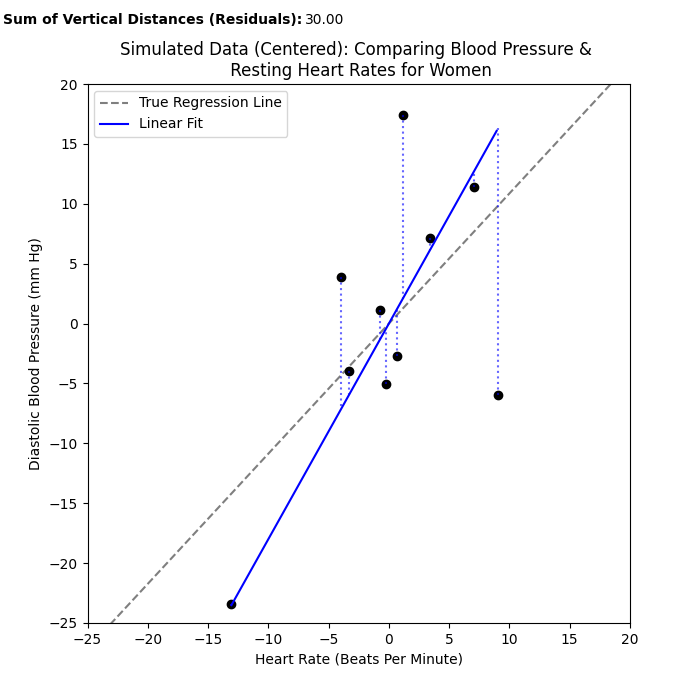

In [14]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.close('all')
            
fig, ax = plt.subplots(figsize=(7,7))
plt.xlabel("Heart Rate (Beats Per Minute)")
plt.ylabel("Diastolic Blood Pressure (mm Hg)")

# Add data points
plt.scatter(X_c[:,0],X_c[:,1], c = 'black', alpha = 1)

plt.title("Simulated Data (Centered): Comparing Blood Pressure & \n Resting Heart Rates for Women")

x_axis = np.arange(np.min(X_c[:,0]), np.max(X_c[:,0]))
x_axis_full = np.arange(-25, 20)
# Force plot to look square
ax.set_xlim(-25,20)
ax.set_ylim(-25,20)

m, b       = np.polyfit(X_c[:,0], X_c[:, 1],1)
reg_line,  = ax.plot(x_axis_full, m*x_axis_full + b, linestyle = 'dashed', color = 'black', alpha = 0.5)
line,      = ax.plot(x_axis, m*x_axis + b, alpha = 1, color = 'blue')
ax.legend(['True Regression Line', 'Linear Fit'], loc = 'upper left')
the_vlines = []

sum_of_vert_dists = make_vlines(X_c[:,0], X_c[:, 1], m, b)
# Display the sum of squared residuals
resid_label = 'Sum of Vertical Distances (Residuals): '
plt.text(-32,25,resid_label, weight='bold')
resid_pt = plt.text(-7, 25, '{:.2f}'.format(sum_of_vert_dists))

num_frames = 40

def animate(i):
    # During the last frame, snap to the true solution
    if i == num_frames - 1: curr_slope = m
    # Otherwise, iterate through possible slopes
    else: curr_slope = -2 + i/10
    line.set_ydata(curr_slope*x_axis + b)
    sum_of_vert_dists = make_vlines(X_c[:,0], X_c[:,1], curr_slope, b, first_run = False)
    resid_pt.set_text('{:.2f}'.format(sum_of_vert_dists))
    fig.canvas.draw_idle()

frames = np.arange(0,40)

frames = np.append(frames, (num_frames-1)*np.ones(10, dtype = np.int64))
# Create an animated GIF of this plot (optional)
ani = FuncAnimation(
    fig, animate, interval=20, frames = frames, blit=True, save_count=50, repeat = True)

plt.show()
# ani.save('animation.gif', writer='imagemagick', fps=20)
